# Итоговый проект по курсу "Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn


## Загрузка необходимых библиотек и подготовка среды

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Загрузка данных

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [3]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

In [4]:
data = pd.read_csv(TRAIN_DATASET_PATH)
print(data.shape)
data.head()

(10000, 20)


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [5]:
test_data = pd.read_csv(TEST_DATASET_PATH)
print(test_data.shape)
test_data.head()

(5000, 19)


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [6]:
data.shape[1]-1 == test_data.shape[1]

True

Скопируем скрипт из семинарских работ и чуть чуть доработаем

In [7]:
def evaluate_preds_2(model, train_data, train_true_values, test_data, test_true_values,  to_fit=True):
    
    if to_fit:
        model.fit(train_data, train_true_values)
    train_pred_values = model.predict(train_data)
    test_pred_values = model.predict(test_data)
    
    print("Train R2:\t" + str(round(r2_score(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2_score(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

## Исследование данных

### Первый взгляд на данные

In [8]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [9]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Для признаков Rooms, HouseFloor, Healthcare_1 заменим тип с float64 на int16

In [11]:
data[['Rooms', 'HouseFloor']] = data[['Rooms', 'HouseFloor']].astype(int)

Признаки Ecology_2, Ecology_3, Shops_2 заменим значения (A, B) на (0, 1)

In [12]:
test_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [13]:
test_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [15]:
test_data[['Rooms', 'HouseFloor']] = test_data[['Rooms', 'HouseFloor']].astype(int)

### Статистика целевого признака

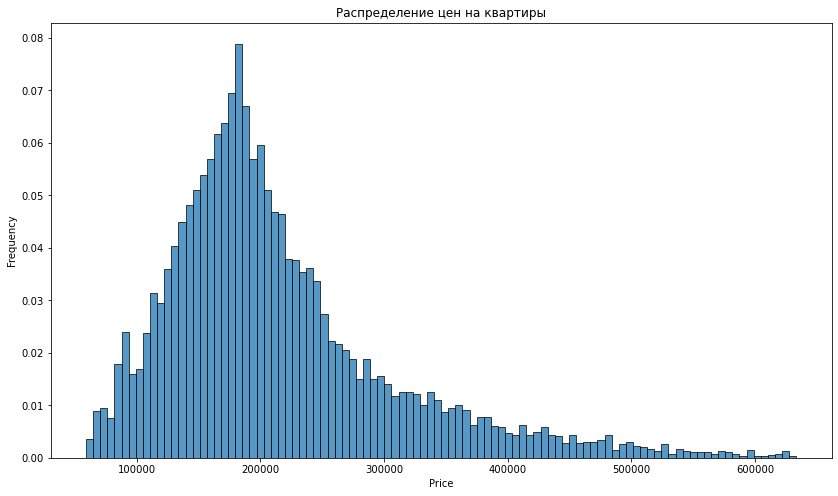

In [16]:
plt.figure(figsize=(14, 8))
sns.histplot(data['Price'], stat='frequency', bins=100)
plt.title('Распределение цен на квартиры')
plt.show()

Распределение с длинным хвостом справа

In [17]:
corr = data.corr().abs()

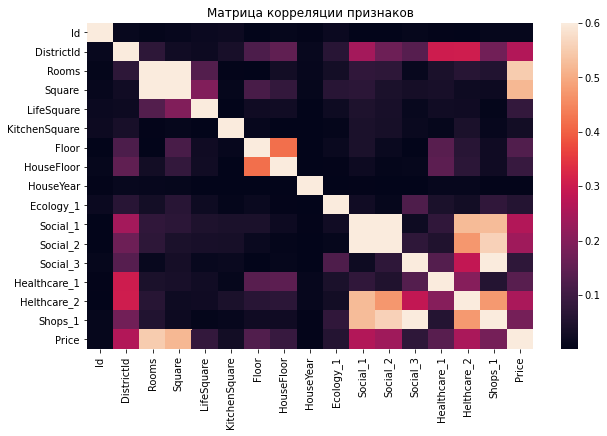

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, vmax=0.6)
plt.title('Матрица корреляции признаков')
plt.show()

Из матрицы корреляции можем увидеть что меньше всего цена на квартиру зависит от признаков Ecology_1, Social_3.<br>
Признаки которые больше всего влияют на цену - это Square и Rooms
Так же очень хорошо коррелируют признаки Rooms и Square между собой, что можно использовать для заполнения признака Rooms с нулевым значением

In [19]:
corr.Price.sort_values()

HouseYear        0.004305
Id               0.009880
KitchenSquare    0.028864
Ecology_1        0.058381
Social_3         0.074878
LifeSquare       0.081292
HouseFloor       0.088280
Floor            0.128715
Healthcare_1     0.138755
Shops_1          0.180876
Social_2         0.239226
Helthcare_2      0.253090
Social_1         0.263286
DistrictId       0.265100
Square           0.520075
Rooms            0.550291
Price            1.000000
Name: Price, dtype: float64

In [20]:
corr.loc['Rooms', 'Square']

0.6628929117377805

In [21]:
test_data[test_data.KitchenSquare > test_data.Square]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1964,14594,11,2,42.795304,24.223770,620.0,11,14,1972,0.038693,B,B,28,6533,1,1015.0,2,5,B
2424,10662,29,1,25.956829,17.251768,33.0,5,5,1973,0.069660,B,B,31,6119,4,NaN,1,2,B
3863,3194,29,2,43.926987,31.028707,44.0,6,5,1964,0.086885,B,B,10,2277,2,1547.0,0,0,B
4555,12640,6,2,54.629142,31.486308,97.0,4,17,2015,0.243205,B,B,5,1564,0,540.0,0,0,B


In [22]:
data[data.KitchenSquare > data.Square]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1,47.100719,46.447960,2014.0,4,1,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
5149,13703,42,1,38.071692,19.723548,73.0,9,10,2006,0.158249,B,B,21,5731,0,NaN,1,0,B,160488.033165
7088,6569,27,1,38.220258,18.716856,84.0,4,17,2018,0.011654,B,B,4,915,0,NaN,0,0,B,99079.960518
8584,14679,81,1,32.276663,19.278394,1970.0,6,1,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


### Rooms

In [23]:
data.Rooms.value_counts()

2     3880
1     3705
3     2235
4      150
5       18
0        8
10       2
19       1
6        1
Name: Rooms, dtype: int64

Рассмотрим квартиры у которых количество комнат больше 5

In [24]:
data[(data.Rooms > 5)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10,59.056975,36.223072,10.0,22,22,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1454,8491,1,19,42.006046,21.779288,7.0,17,17,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
2170,14003,99,6,59.414334,38.702244,6.0,7,9,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416
8849,14865,9,10,60.871266,38.420681,10.0,3,2,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


Похоже что количество комант указано ошибочно <br>
Так как признак 'Rooms' сильно влияет настоимость квартиры, исправим его в стрчках у которых он = 0 или больше 5 <br>
Проанализируем площадь помещений в зависимости от количества комнат

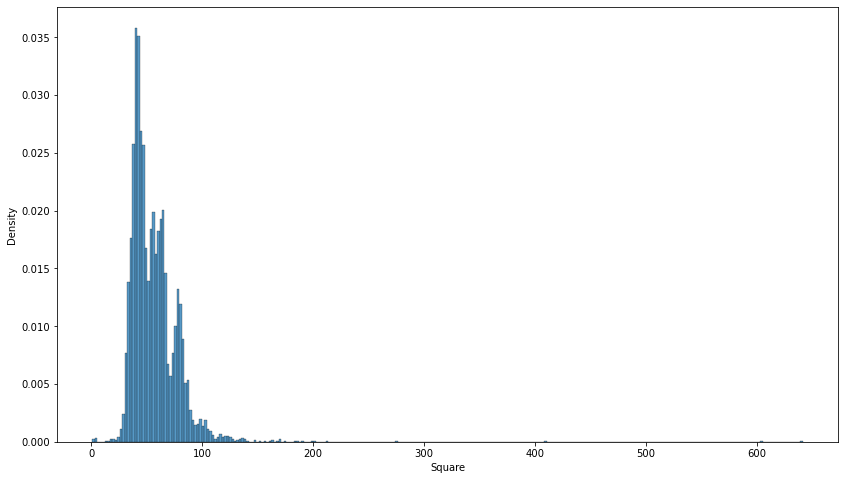

In [25]:
plt.figure(figsize=(14, 8))
sns.histplot(data=data, x='Square', stat='density');

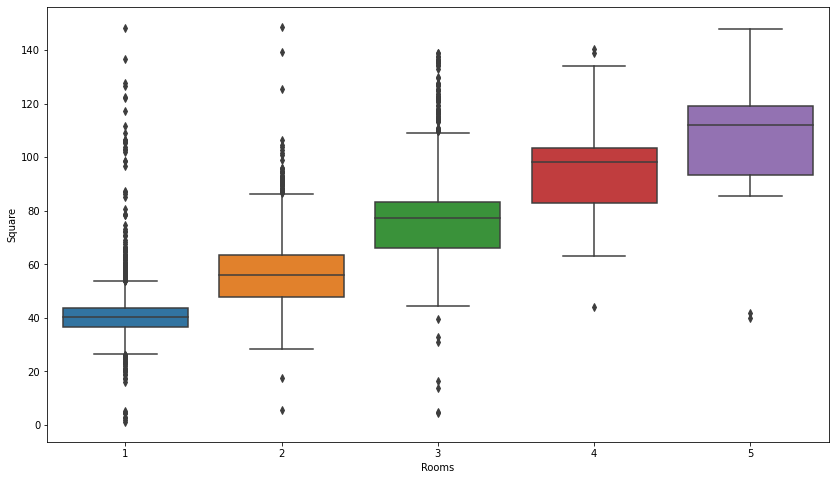

In [26]:
plt.figure(figsize=(14, 8))
#sns.color_palette("tab10")
sns.boxplot(data=data[(data.Rooms < 6)  & (data.Rooms > 0) & (data.Square<150)], y='Square', x='Rooms');

In [27]:
for i in range(1, 6):
    print(f'Количество комнат {i}')
    print(data[(data.Rooms == i) & (data.Square < 200)]['Square'].describe())
    print()

Количество комнат 1
count    3704.000000
mean       41.223898
std         9.696644
min         1.136859
25%        36.691031
50%        40.404347
75%        43.561278
max       174.649522
Name: Square, dtype: float64

Количество комнат 2
count    3878.000000
mean       56.496260
std        10.880330
min         5.497061
25%        47.868173
50%        55.833543
75%        63.319925
max       170.379494
Name: Square, dtype: float64

Количество комнат 3
count    2235.000000
mean       76.903234
std        15.725388
min         4.390331
25%        65.995703
50%        77.413643
75%        83.215957
max       190.857689
Name: Square, dtype: float64

Количество комнат 4
count    149.000000
mean      97.693268
std       22.371755
min       44.128947
25%       83.833387
50%       98.649404
75%      104.313775
max      186.692602
Name: Square, dtype: float64

Количество комнат 5
count     17.000000
mean     113.613157
std       40.174086
min       39.906082
25%       95.617533
50%      114.313

Примемэмпирическое правило <br>
1 комната если площадь < 45 <br>
2 команты если 45 < площадь < 64 <br>
3 команты если 64 < площадь < 83 <br>
4 команты если 83 < площадь < 100 <br>
5 комант если 100 < площадь <br>

In [28]:
def app(x):
    if x < 45:
        return 1
    elif x < 64:
        return 2
    elif x < 83:
        return 3
    elif x < 100:
        return 4
    else:
        return 5

In [29]:
data.loc[(data.Rooms == 0) | 
         (data.Rooms > 5), 'Rooms'] = data[(data.Rooms == 0) | 
                                           (data.Rooms > 5)]['Square'].apply(app)

In [30]:
test_data.loc[(test_data.Rooms == 0) | 
              (test_data.Rooms > 5), 'Rooms'] = test_data[(test_data.Rooms == 0) | 
                                                          (test_data.Rooms > 5)]['Square'].apply(app)

In [31]:
data.Rooms.value_counts()

2    3884
1    3709
3    2236
4     151
5      20
Name: Rooms, dtype: int64

In [32]:
test_data.Rooms.value_counts()

2    2031
1    1769
3    1100
4      90
5      10
Name: Rooms, dtype: int64

### Healthcare_1

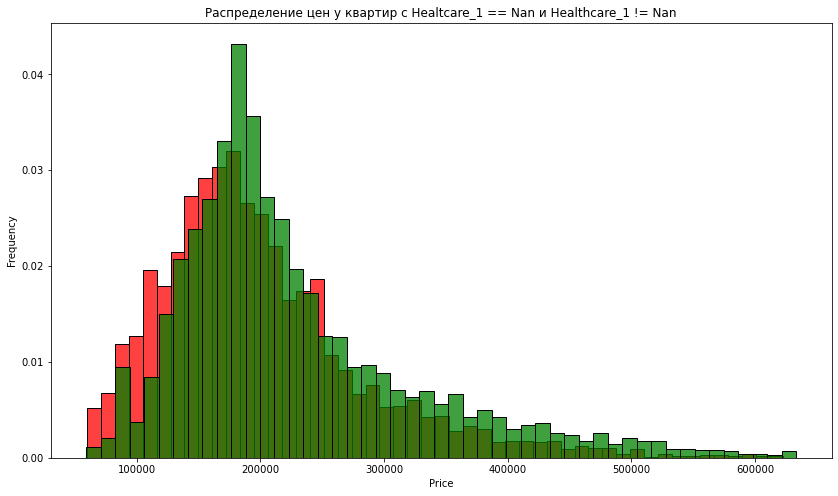

In [33]:
plt.figure(figsize=(14, 8))
sns.histplot(data[data['Healthcare_1'].isna()]['Price'], color='Red', stat='frequency')
sns.histplot(data[~data['Healthcare_1'].isna()]['Price'], color='Green', stat='frequency')
plt.title('Распределение цен у квартир c Healtcare_1 == Nan и Healthcare_1 != Nan')
plt.show()

Распределение цен квартиры у которых Healtcare_1 = NaN слегка смещено влево. Это может пригодится для расчёта цены.<br> 
Добавим признак с отметкой что в этих строчках не было Heathcare_1. <br>
NaN в этом столбце заменим на (-1000).

In [34]:
data['Healthcare_1_NaN'] = data['Healthcare_1'].isna().astype(int)
test_data['Healthcare_1_NaN'] = test_data['Healthcare_1'].isna().astype(int)

In [35]:
data['Healthcare_1'].fillna(-1000, inplace=True)
test_data['Healthcare_1'].fillna(-1000, inplace=True)

In [36]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Healthcare_1_NaN
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,...,B,33,7976,5,-1000.0,0,11,B,184966.930730,1
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,...,B,46,10309,1,240.0,1,16,B,300009.450063,0
2,4765,53,2,44.947953,29.197612,0.0,8,12,1968,0.049637,...,B,34,7759,0,229.0,1,3,B,220925.908524,0
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,...,B,23,5735,3,1084.0,0,5,B,175616.227217,0
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,...,B,35,5776,1,2078.0,2,4,B,150226.531644,0


### LifeSquare

Так как признак LifeSquare обладает небольшой корреляцией с ценой квартиры и имеет большой процент пропусков, принято решение не учитывать это поле при оценке цены

In [37]:
data.drop('LifeSquare', axis=1, inplace = True)

In [38]:
test_data.drop('LifeSquare', axis=1, inplace = True)

### KitchenSquare

In [39]:
data[data.KitchenSquare > data.Square].head()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Healthcare_1_NaN
1064,14656,62,1,47.100719,2014.0,4,1,2014,0.072158,B,B,2,629,1,-1000.0,0,0,A,108337.484207,1
5149,13703,42,1,38.071692,73.0,9,10,2006,0.158249,B,B,21,5731,0,-1000.0,1,0,B,160488.033165,1
7088,6569,27,1,38.220258,84.0,4,17,2018,0.011654,B,B,4,915,0,-1000.0,0,0,B,99079.960518,1
8584,14679,81,1,32.276663,1970.0,6,1,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275,0


In [40]:
test_data[test_data.KitchenSquare > test_data.Square].head()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Healthcare_1_NaN
1964,14594,11,2,42.795304,620.0,11,14,1972,0.038693,B,B,28,6533,1,1015.0,2,5,B,0
2424,10662,29,1,25.956829,33.0,5,5,1973,0.069660,B,B,31,6119,4,-1000.0,1,2,B,1
3863,3194,29,2,43.926987,44.0,6,5,1964,0.086885,B,B,10,2277,2,1547.0,0,0,B,0
4555,12640,6,2,54.629142,97.0,4,17,2015,0.243205,B,B,5,1564,0,540.0,0,0,B,0


Поля в которых KitchenSquare > Square заменим KitchenSquare на Square / 5

In [41]:
data.loc[data.KitchenSquare > data.Square, 'KitchenSquare'] = data.loc[data.KitchenSquare > data.Square, 'Square'] / 5
test_data.loc[test_data.KitchenSquare > test_data.Square, 
              'KitchenSquare'] = test_data.loc[test_data.KitchenSquare > test_data.Square, 'Square'] / 5

## Подготовка признаков

Заменим столбцы с тектовыми значениями ('A', 'B') на 0, 1 <br>
Удалим столбцы с низкой коореляцией к цене

In [42]:
def prepare_data(dat):
    dat['Ecology_2'] = dat['Ecology_2'].replace({'A': 0, 'B': 1})
    dat['Ecology_3'] = dat['Ecology_3'].replace({'A': 0, 'B': 1})
    dat['Shops_2'] = dat['Shops_2'].replace({'A': 0, 'B': 1})

In [43]:
prepare_data(data)

In [44]:
prepare_data(test_data)

## Разбиение на трейн и тест

In [45]:
y = data['Price']
X = data.drop('Price', axis=1)

In [46]:
X.drop('Id', axis=1, inplace=True)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, shuffle=True, random_state=42)

In [48]:
X_train

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Healthcare_1_NaN
4901,1,1,39.248800,0.0,9,17,1977,0.007122,1,1,1,264,0,-1000.0,0,1,1,1
4375,61,2,56.053580,8.0,8,12,1986,0.300323,1,1,52,10311,6,-1000.0,1,9,1,1
6698,13,1,41.009788,8.0,3,14,1997,0.090799,1,1,74,19083,2,-1000.0,5,15,1,1
9805,9,2,63.640480,1.0,3,1,1977,0.161532,1,1,25,5648,1,30.0,2,4,1,0
1101,90,1,49.327912,12.0,15,23,2008,0.246032,1,0,22,3151,4,2715.0,3,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,30,2,62.219340,1.0,4,2,2015,0.000078,1,1,22,6398,141,1046.0,3,23,1,0
5191,25,3,85.790813,1.0,9,25,2018,0.069753,1,1,53,13670,4,-1000.0,1,11,1,1
5390,1,3,83.225854,1.0,13,17,1977,0.007122,1,1,1,264,0,-1000.0,0,1,1,1
860,94,3,51.354934,5.0,1,9,1973,0.127376,1,1,43,8429,3,-1000.0,3,9,1,1


## Построение модели

Попробуем две модели с параметрами по умолчанию, на не обработанных данных. LinearRegression и RandomForestRegressor 

In [49]:
rf_model = RandomForestRegressor(random_state=42)
#rf_model.fit(X_train, y_train)

Train R2:	0.963
Test R2:	0.727


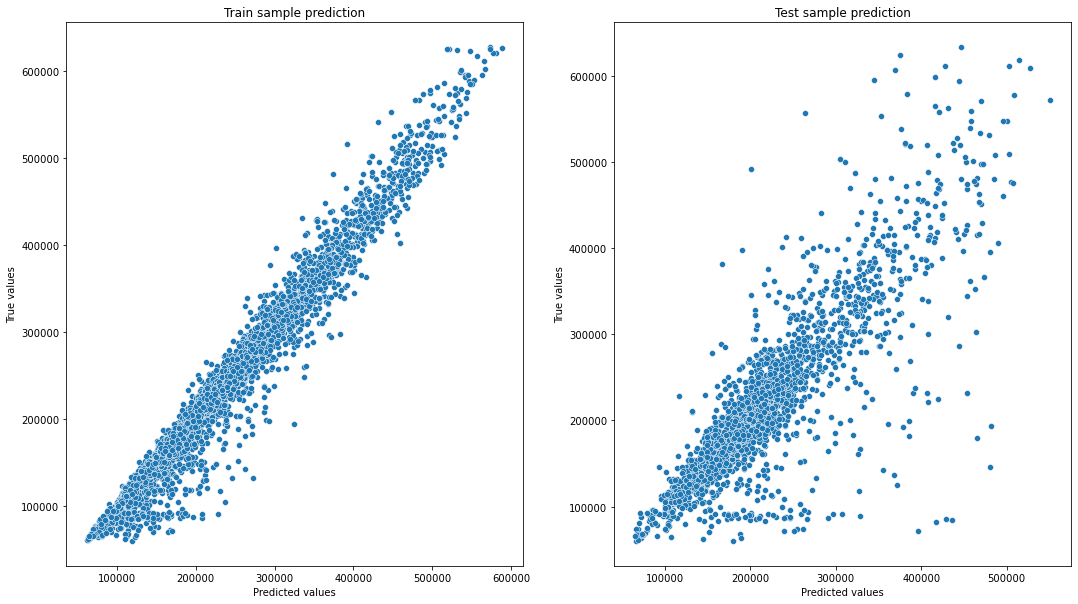

In [50]:
evaluate_preds_2(rf_model, 
                 X_train, y_train, X_test, y_test)

In [51]:
print('Важность параметров')
for n, v in sorted(zip(X_train.columns, rf_model.feature_importances_), key=lambda x: x[1], reverse=True):
    print(f'{n} \t - \t {v:.4f}')

Важность параметров
Square 	 - 	 0.4066
Social_2 	 - 	 0.0984
Social_1 	 - 	 0.0934
Rooms 	 - 	 0.0729
Social_3 	 - 	 0.0558
DistrictId 	 - 	 0.0526
Ecology_1 	 - 	 0.0430
HouseYear 	 - 	 0.0414
Floor 	 - 	 0.0340
KitchenSquare 	 - 	 0.0291
HouseFloor 	 - 	 0.0233
Healthcare_1 	 - 	 0.0209
Shops_1 	 - 	 0.0179
Helthcare_2 	 - 	 0.0073
Healthcare_1_NaN 	 - 	 0.0015
Shops_2 	 - 	 0.0008
Ecology_3 	 - 	 0.0007
Ecology_2 	 - 	 0.0004


In [52]:
# Для линейной модели данные надо дополнительн обработать
mms = MinMaxScaler()
X_train_scal = mms.fit_transform(X_train)
X_test_scal = mms.transform(X_test)

Train R2:	0.518
Test R2:	0.467


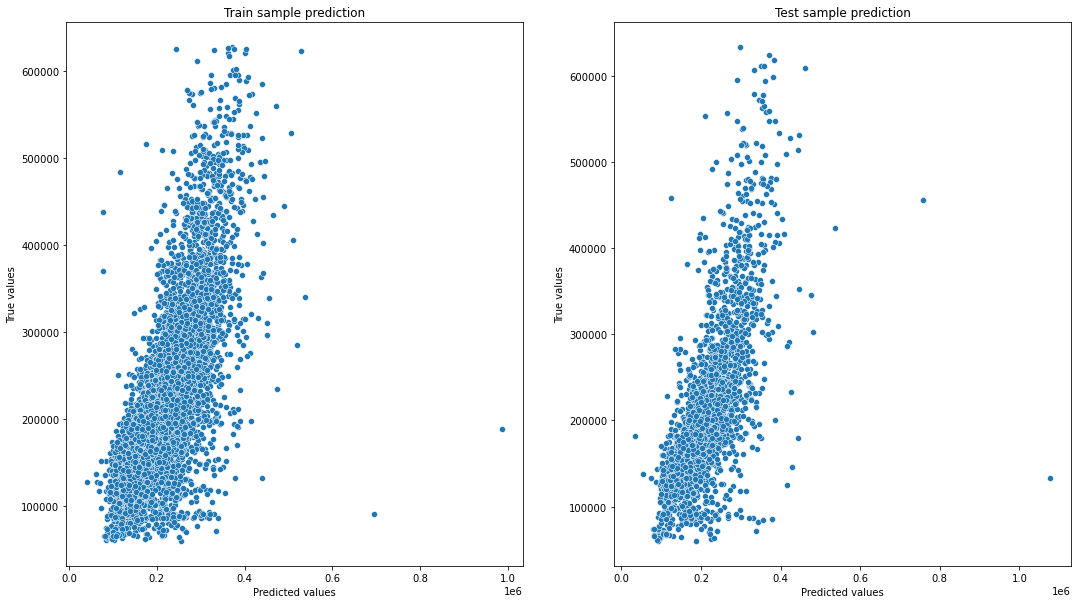

In [53]:
lr_model = LinearRegression()
evaluate_preds_2(lr_model, 
                 X_train, y_train, X_test, y_test)

In [54]:
print('Важность параметров')
for n, v in sorted(zip(X_train.columns, map(abs, lr_model.coef_)), key=lambda x: x[1], reverse=True):
    print(f'{n} \t - \t {v:.4f}')

Важность параметров
Ecology_1 	 - 	 55601.7128
Ecology_2 	 - 	 44760.9709
Rooms 	 - 	 36098.1859
Ecology_3 	 - 	 19711.6124
Shops_2 	 - 	 16008.5384
Helthcare_2 	 - 	 4473.2583
Healthcare_1_NaN 	 - 	 2488.6333
Floor 	 - 	 2031.0725
KitchenSquare 	 - 	 1417.7488
Square 	 - 	 1405.2819
Social_1 	 - 	 1217.0992
HouseFloor 	 - 	 835.4088
Shops_1 	 - 	 813.5987
DistrictId 	 - 	 392.9855
Social_3 	 - 	 83.4292
Healthcare_1 	 - 	 5.7981
Social_2 	 - 	 1.5226
HouseYear 	 - 	 0.0030


Train R2:	0.776
Test R2:	0.631


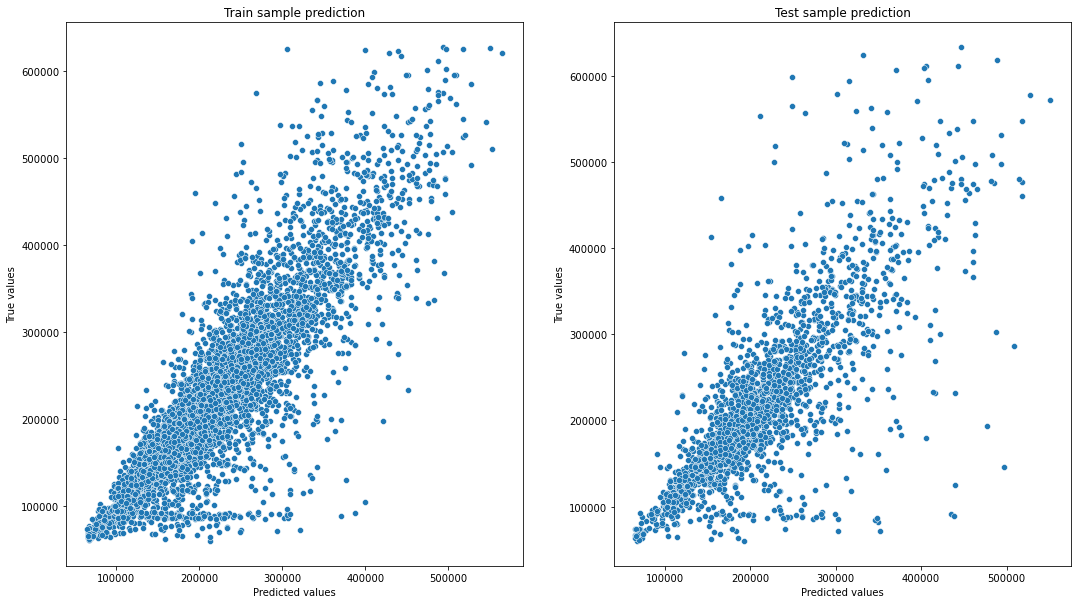

In [55]:
knr = KNeighborsRegressor()
evaluate_preds_2(knr, 
                 X_train, y_train, X_test, y_test)

Для дальнейшей настройки возьмём RandomForestRegressor

## Подбор метапараметров для RandomForestRegression

In [56]:
#parametrs = { 'max_depth':[100, 150, 200, 250 ], 'min_samples_split':[8, 10, 15, 20, 25], 'n_estimators': [120, 130, 150, 160, 170]}
#gs = GridSearchCV(RandomForestRegressor(), param_grid=parametrs, scoring='r2', verbose = 4, n_jobs=-1)

In [57]:
#gs.fit(X_train, y_train)

In [58]:
#gs.best_estimator_

In [59]:
#gs.best_estimator_

In [60]:
# evaluate_preds_2(gs.best_estimator_, 
#                  X_train, y_train, X_test, y_test, to_fit=False)

## Обучение модели и предсказание

In [61]:
X_train = X
y_train = y

In [62]:
X_test_id = test_data['Id']
X_test = test_data.drop('Id', axis=1)

In [64]:
rf_model_final = RandomForestRegressor(max_depth=150, min_samples_split=10, n_estimators=150)

In [65]:
rf_model_final.fit(X_train, y_train)

RandomForestRegressor(max_depth=150, min_samples_split=10, n_estimators=150)

In [66]:
Price = rf_model_final.predict(X_test)

In [71]:
#result = pd.DataFrame(np.hstack([X_test_id, Price]), columns=['Id', 'Price'])
result = pd.DataFrame(np.hstack((np.array(X_test_id).reshape(5000, -1), Price.reshape(5000, -1))), columns=['Id', 'Price'])
result['Id'] = result['Id'].astype(int)
result.head()

,Id,Price
0,725,157984.445157
1,15856,214245.530124
2,5480,207154.689153
3,15664,332924.410680
4,14275,144940.973924


In [68]:
result.to_csv('SShirkin_predictions.csv', index=False)

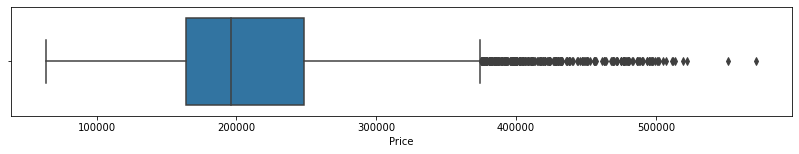

In [69]:
plt.figure(figsize=(14, 2))
sns.boxplot(result.Price);

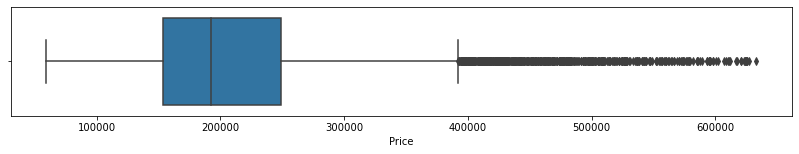

In [70]:
plt.figure(figsize=(14, 2))
sns.boxplot(data.Price);